# Prediction of Toddler Autism using machine learning algorithms

In [ ]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from urllib.request import urlopen 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
%matplotlib inline

In [456]:
df= pd.read_csv('Toddler Autism dataset July 2018.csv', encoding='utf-8')
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [457]:
missing_values_df = df.isnull().sum()
print("missing values in each coulmn:", '\n')
print( missing_values_df)

missing values in each coulmn: 

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64


In [458]:
df.shape

(1054, 19)

In [459]:
df.dtypes

Case_No                    int64
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object

In [460]:
df['Sex'] = df['Sex'].map({'f':0, 'm':1})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,White European,no,yes,family member,Yes


In [461]:
df['Ethnicity'] = df['Ethnicity'].map({'Hispanic':0, 'Latino':1, 'Native Indian':2, 'Others':3, 'Pacifica':4, 
                                       'White European':5, 'asian':6, 'black':7, 'middle eastern':8, 'mixed':9, 
                                       'south asian':10})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,8,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,5,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,8,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,5,no,yes,family member,Yes


In [462]:
df['Who completed the test'] = df['Who completed the test'].map({'Health Care Professional':0, 'Health care professional':0, 
                                                                 'Others':1, 'Self':2, 'family member':3})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,8,yes,no,3,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,5,yes,no,3,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,8,yes,no,3,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,no,no,3,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,5,no,yes,3,Yes


In [463]:
df['Jaundice'] = df['Jaundice'].map({'no':0, 'yes':1})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,no,3,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,no,3,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,no,3,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,no,3,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,yes,3,Yes


In [464]:
df['Family_mem_with_ASD'] = df['Family_mem_with_ASD'].map({'no':0, 'yes':1})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,3,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,3,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,3,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,3,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,3,Yes


In [465]:
df['Class/ASD Traits '] = df['Class/ASD Traits '].map({'No':0, 'Yes':1})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,3,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,3,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,3,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,3,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,3,1


In [466]:
df.dtypes

Case_No                   int64
A1                        int64
A2                        int64
A3                        int64
A4                        int64
A5                        int64
A6                        int64
A7                        int64
A8                        int64
A9                        int64
A10                       int64
Age_Mons                  int64
Qchat-10-Score            int64
Sex                       int64
Ethnicity                 int64
Jaundice                  int64
Family_mem_with_ASD       int64
Who completed the test    int64
Class/ASD Traits          int64
dtype: object

In [467]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.00000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524,0.697343,5.863378,0.273245,0.161290,2.90797,0.690702
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304,0.459626,2.098325,0.445837,0.367973,0.50456,0.462424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000,0.000000,5.000000,0.000000,0.000000,3.00000,0.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000,1.000000,6.000000,0.000000,0.000000,3.00000,1.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000,1.000000,7.000000,1.000000,0.000000,3.00000,1.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000,1.000000,10.000000,1.000000,1.000000,3.00000,1.000000


In [468]:
X1 = df.iloc[:, 1:12]
X2 = df.iloc[:, 13:17]
X = pd.concat([X1, X2], axis=1)
y = df.iloc[:, 18]

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 123)

In [469]:
# Check that the data were split correctly
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
680,1,1,1,1,1,0,1,1,1,1,19,0,5,1,0
448,1,1,0,0,1,1,1,0,0,1,36,1,5,1,0
1035,1,0,0,1,0,1,1,1,0,0,18,1,3,1,0
973,1,1,0,1,1,1,0,1,0,1,36,1,5,1,1
594,0,1,1,1,1,1,1,1,1,0,36,1,7,0,0


In [470]:
# Check that the data were split correctly
print(y_train.value_counts())
print('\n')

y_train.value_counts()/len(y_train)

1    592
0    251
Name: Class/ASD Traits , dtype: int64




1    0.702254
0    0.297746
Name: Class/ASD Traits , dtype: float64

In [471]:
# Check that the data were split correctly
print(y_test.value_counts())
print('\n')

y_test.value_counts()/len(y_test)

1    136
0     75
Name: Class/ASD Traits , dtype: int64




1    0.64455
0    0.35545
Name: Class/ASD Traits , dtype: float64

# Random Forest Classifier

In [472]:
rf = RandomForestClassifier(random_state=456)

rf.fit(X_train, y_train) 

C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=456,
                       verbose=0, warm_start=False)

In [473]:
random_forest_prediction = rf.predict(X_test)

In [474]:
print("Confusion Matrix: \n", confusion_matrix(y_test, random_forest_prediction))
print("Accuracy Score: ", accuracy_score(y_test, random_forest_prediction))

Model_compare = pd.DataFrame(columns = [])
     
fp, tp, th = roc_curve(y_test, random_forest_prediction)
Model_name = rf.__class__.__name__
Model_compare.loc[0,'Model Name'] = Model_name
Model_compare.loc[0, 'Model Train Accuracy'] = round(rf.score(X_train, y_train), 4)
Model_compare.loc[0, 'Model Test Accuracy'] = round(rf.score(X_test, y_test), 4)
Model_compare.loc[0, 'Model Precision'] = precision_score(y_test, random_forest_prediction)
Model_compare.loc[0, 'Model Recall'] = recall_score(y_test, random_forest_prediction)
Model_compare.loc[0, 'Model AUC'] = auc(fp, tp)
  
Model_compare

Confusion Matrix: 
 [[ 66   9]
 [  6 130]]
Accuracy Score:  0.9289099526066351


,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precision,Model Recall,Model AUC
0,RandomForestClassifier,0.9964,0.9289,0.935252,0.955882,0.917941


### Variable Importance

In [475]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
A7,0.169759
A9,0.146141
A6,0.145065
A5,0.113269
A4,0.091803
A2,0.064610
A1,0.055474
Age_Mons,0.050611
A8,0.037756
Ethnicity,0.033669


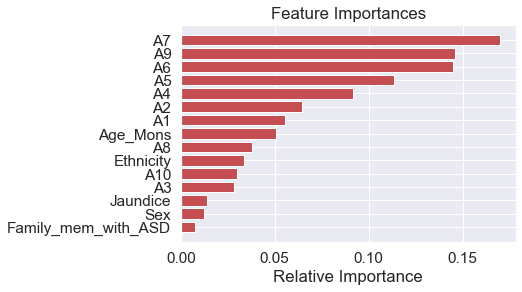

In [476]:
features = X.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

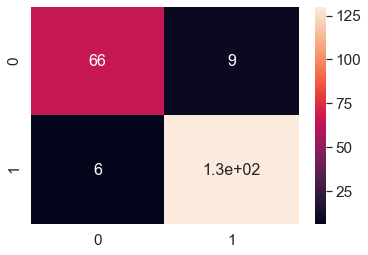

In [477]:
# plot confusion matrix
cm = confusion_matrix(y_test, random_forest_prediction)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

### Tuning The Parameters

#### N_estimator

Text(0.5, 0, 'n_estimators')

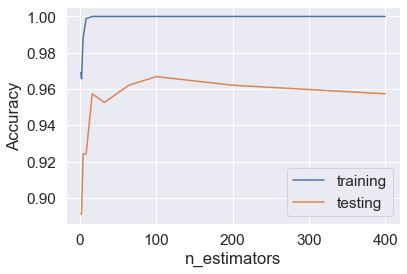

In [478]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400]
tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for est in n_estimators:
    rf = RandomForestClassifier(n_estimators= est)
    rf.fit(X_train,y_train)
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
    
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

line_1, = plt.plot(n_estimators, tr_accuracy, label='training')
line_2, = plt.plot(n_estimators, tst_accuracy, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')


#### Max_Depth

In [479]:
max_depths = np.linspace(1, 20,20, endpoint=True)

tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth = max_depth)
    rf.fit(X_train,y_train)
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
    
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Text(0.5, 0, 'Tree Depth')

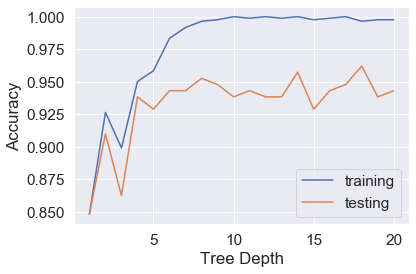

In [480]:
line_1, = plt.plot(max_depths, tr_accuracy, label='training')
line_2, = plt.plot(max_depths, tst_accuracy, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')

#### Max_features

C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Text(0.5, 0, 'Max features')

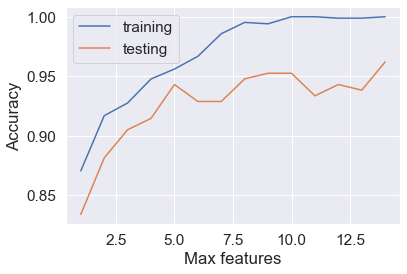

In [481]:
max_features = list(range(1,X_train.shape[1]))

tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for i in max_features:
    rf = RandomForestClassifier(max_depth = i)
    rf.fit(X_train,y_train)
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
    
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

line_1, = plt.plot(max_features, tr_accuracy, label='training')
line_2, = plt.plot(max_features, tst_accuracy, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('Max features')

#### Use GridSearchCV to optimize the parameters

In [482]:
np.random.seed(123)
start = time.time()
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depths = (2,3,4)
boot_strap = (True, False)
min_samples_splits = [2,3,5]
min_samples_leafs = [1,5,8]
max_features = ('auto', 'sqrt', 'log2', None)
criteria = ('gini', 'entropy')
parameters = {'max_depth': max_depths,
              'bootstrap': boot_strap,
              'max_features': max_features,
              'criterion': criteria,
              'min_samples_split': min_samples_splits,
              'min_samples_leaf': min_samples_leafs
             }

rf = RandomForestClassifier(random_state=456)

rf_model = GridSearchCV(rf, parameters,cv = 10,n_jobs = 3)

rf_model.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      rf_model.best_params_)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

rf = rf_model.best_estimator_

rf.fit(X_train, y_train)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}
Time taken in grid search:  104.69


C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=456,
                       verbose=0, warm_start=False)

## K-Nearest Neighbors Classifier

In [483]:
from sklearn.neighbors import KNeighborsClassifier  
knn_classifier = KNeighborsClassifier(n_neighbors=3)  
knn_classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [484]:
# List of the neighbors
knn_classifier.kneighbors(X_test)[1]

array([[467, 827, 736],
       [414, 480, 132],
       [134, 456, 286],
       [567, 606,  93],
       [450, 111, 654],
       [338, 272, 117],
       [ 10, 171,  99],
       [538, 563, 778],
       [421, 192, 534],
       [637, 143, 364],
       [ 58, 714, 107],
       [148, 773, 776],
       [368, 252, 188],
       [117, 820, 272],
       [456, 216, 286],
       [291, 394, 409],
       [ 70, 742, 714],
       [ 95, 750,  80],
       [208, 773, 776],
       [800, 481, 717],
       [702, 443, 588],
       [193, 161, 451],
       [332, 385, 500],
       [353, 738, 221],
       [344, 808, 322],
       [739,  76, 548],
       [281, 303, 537],
       [150, 813, 426],
       [317, 694, 589],
       [175, 692, 663],
       [ 22, 740, 674],
       [258, 250, 195],
       [500, 361, 390],
       [612, 304, 455],
       [434, 133, 373],
       [532, 520, 835],
       [123, 503, 841],
       [746,  98, 756],
       [758, 518, 799],
       [770, 309, 701],
       [234,   5,  86],
       [212, 132

In [485]:
knn_prediction = knn_classifier.predict(X_test)  

In [486]:
print("confusion matrix\n", confusion_matrix(y_test, knn_prediction))

print("\n accuracy score: ", accuracy_score(y_test, knn_prediction))  

confusion matrix
 [[ 71   4]
 [ 12 124]]

 accuracy score:  0.9241706161137441


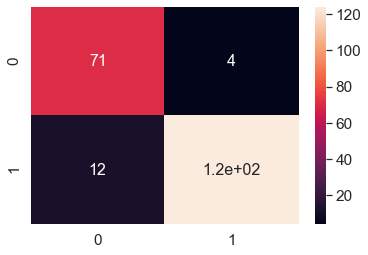

In [487]:
# plot confusion matrix
cm = confusion_matrix(y_test, knn_prediction)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [488]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

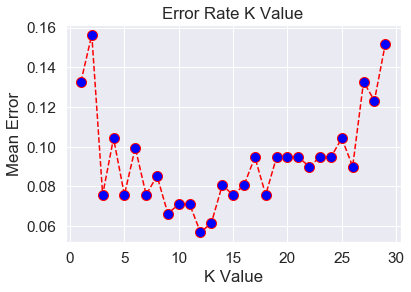

In [489]:
#plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

From the output we can see that the mean error is zero when the value of the K is 11.

In [490]:
from sklearn.neighbors import KNeighborsClassifier  
knn_classifier = KNeighborsClassifier(n_neighbors=11)  
knn_classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [491]:
knn_classifier.kneighbors(X_test)[1]

array([[467, 736, 827, ..., 306,  94, 733],
       [480, 414, 815, ..., 674, 500,  44],
       [286, 134, 456, ...,  12, 216, 827],
       ...,
       [194, 372, 770, ..., 176, 577, 128],
       [224, 522, 711, ..., 776,  40, 208],
       [482, 630, 544, ..., 450,  15, 410]], dtype=int64)

In [492]:
knn_prediction = knn_classifier.predict(X_test)  

In [493]:
print("confusion matrix\n", confusion_matrix(y_test, knn_prediction))

print("\n accuracy score: ", accuracy_score(y_test, knn_prediction))  

confusion matrix
 [[ 68   7]
 [  8 128]]

 accuracy score:  0.9289099526066351


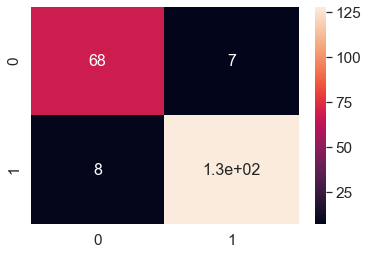

In [494]:
# plot confusion matrix
cm = confusion_matrix(y_test, knn_prediction)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [495]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=10)
model.fit(X_train, y_train)
model.best_params_


{'n_neighbors': 5}

In [496]:
from sklearn.neighbors import KNeighborsClassifier  
knn_classifier = KNeighborsClassifier(n_neighbors=17)  
knn_classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [497]:
knn_classifier.kneighbors(X_test)[1]

array([[467, 736, 708, ..., 267, 320, 441],
       [414, 480, 815, ..., 792, 658, 438],
       [456, 134, 286, ..., 264, 733, 306],
       ...,
       [194, 714, 372, ...,  58, 577, 243],
       [224, 522,  85, ..., 168,  19, 432],
       [544, 654, 482, ..., 413, 202, 450]], dtype=int64)

In [498]:
knn_prediction = knn_classifier.predict(X_test)  

In [499]:
print("confusion matrix\n", confusion_matrix(y_test, knn_prediction))

print("\n accuracy score: ", accuracy_score(y_test, knn_prediction)) 

confusion matrix
 [[ 63  12]
 [  8 128]]

 accuracy score:  0.9052132701421801


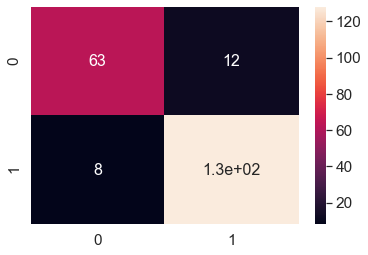

In [500]:
# plot confusion matrix
cm = confusion_matrix(y_test, knn_prediction)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [501]:
fp, tp, th = roc_curve(y_test, y_pred)
Model_name = knn_classifier.__class__.__name__
Model_compare.loc[1,'Model Name'] = Model_name
Model_compare.loc[1, 'Model Train Accuracy'] = round(knn_classifier.score(X_train, y_train), 4)
Model_compare.loc[1, 'Model Test Accuracy'] = round(knn_classifier.score(X_test, y_test), 4)
Model_compare.loc[1, 'Model Precision'] = precision_score(y_test, y_pred)
Model_compare.loc[1, 'Model Recall'] = recall_score(y_test, y_pred)
Model_compare.loc[1, 'Model AUC'] = auc(fp, tp)

Model_compare

,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precision,Model Recall,Model AUC
0,RandomForestClassifier,0.9964,0.9289,0.935252,0.955882,0.917941
1,KNeighborsClassifier,0.9348,0.9052,1.000000,1.000000,1.000000


## SVM Classifier

In [502]:
from sklearn import svm
clf_svm = svm.SVC(probability=True).fit(X_train, y_train)
print(clf_svm.score(X_test, y_test))

0.95260663507109


C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [503]:
# View indices of support vectors
clf_svm.support_

array([ 17,  23,  31,  32,  38,  40,  46,  48,  49,  50,  51,  52,  55,
        59,  65,  66,  69,  90, 103, 109, 116, 119, 129, 131, 149, 150,
       152, 159, 161, 169, 176, 178, 182, 188, 190, 198, 203, 204, 210,
       215, 222, 236, 240, 249, 259, 260, 261, 268, 271, 275, 281, 294,
       297, 303, 310, 322, 328, 333, 346, 351, 352, 367, 375, 391, 404,
       406, 407, 412, 423, 432, 434, 435, 451, 454, 456, 457, 460, 469,
       477, 484, 487, 488, 493, 499, 501, 503, 506, 513, 520, 531, 532,
       535, 537, 538, 540, 549, 550, 551, 556, 567, 570, 574, 576, 586,
       590, 592, 597, 610, 613, 615, 617, 624, 633, 646, 656, 668, 672,
       677, 689, 691, 692, 696, 720, 724, 726, 727, 733, 734, 737, 747,
       750, 755, 759, 761, 783, 788, 796, 800, 813, 817, 823, 824, 825,
       832, 838, 839, 842,   2,  20,  21,  28,  34,  36,  37,  41,  44,
        45,  60,  64,  73,  79,  80,  82,  87,  88,  89,  93,  99, 107,
       110, 112, 115, 125, 139, 141, 153, 162, 163, 174, 185, 18

In [504]:
# View number of support vectors in each class 
clf_svm.n_support_

array([147, 165])

In [505]:
y_pred_svm = clf_svm.predict(X_test)

In [506]:
print("confusion matrix\n", confusion_matrix(y_test, y_pred_svm))  

print("\n accuracy score: ", accuracy_score(y_test, y_pred))

confusion matrix
 [[ 69   6]
 [  4 132]]

 accuracy score:  1.0


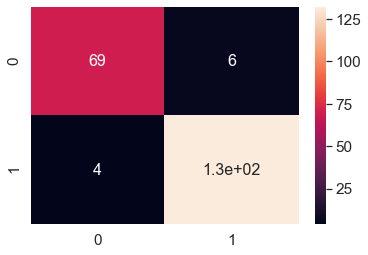

In [507]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [508]:
fp, tp, th = roc_curve(y_test, y_pred_svm)
Model_name = clf_svm.__class__.__name__
Model_compare.loc[2,'Model Name'] = Model_name
Model_compare.loc[2, 'Model Train Accuracy'] = round(clf_svm.score(X_train, y_train), 4)
Model_compare.loc[2, 'Model Test Accuracy'] = round(clf_svm.score(X_test, y_test), 4)
Model_compare.loc[2, 'Model Precision'] = precision_score(y_test, y_pred_svm)
Model_compare.loc[2, 'Model Recall'] = recall_score(y_test, y_pred_svm)
Model_compare.loc[2, 'Model AUC'] = auc(fp, tp)

Model_compare

,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precision,Model Recall,Model AUC
0,RandomForestClassifier,0.9964,0.9289,0.935252,0.955882,0.917941
1,KNeighborsClassifier,0.9348,0.9052,1.000000,1.000000,1.000000
2,SVC,0.9858,0.9526,0.956522,0.970588,0.945294


## GuassianNB

In [509]:
gnb_model = GaussianNB().fit(X_train, y_train)

In [510]:
gnb_prediction = gnb_model.predict(X_test)

In [511]:
cm = confusion_matrix(y_test, gnb_prediction)
print("confusion matrix\n", cm)
print("\nAccuracy Score: ", accuracy_score(y_test, gnb_prediction))

confusion matrix
 [[ 67   8]
 [  4 132]]

Accuracy Score:  0.943127962085308


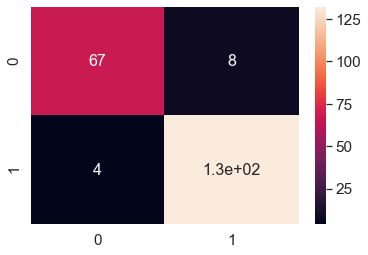

In [512]:
# plot confusion matrix
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [513]:
fp, tp, th = roc_curve(y_test, gnb_prediction)
Model_name = gnb_model.__class__.__name__
Model_compare.loc[3,'Model Name'] = Model_name
Model_compare.loc[3, 'Model Train Accuracy'] = round(gnb_model.score(X_train, y_train), 4)
Model_compare.loc[3, 'Model Test Accuracy'] = round(gnb_model.score(X_test, y_test), 4)
Model_compare.loc[3, 'Model Precision'] = precision_score(y_test, gnb_prediction)
Model_compare.loc[3, 'Model Recall'] = recall_score(y_test, gnb_prediction)
Model_compare.loc[3, 'Model AUC'] = auc(fp, tp)

Model_compare

,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precision,Model Recall,Model AUC
0,RandomForestClassifier,0.9964,0.9289,0.935252,0.955882,0.917941
1,KNeighborsClassifier,0.9348,0.9052,1.000000,1.000000,1.000000
2,SVC,0.9858,0.9526,0.956522,0.970588,0.945294
3,GaussianNB,0.9502,0.9431,0.942857,0.970588,0.931961


## Logistic Regression

In [514]:
logistic_model = LogisticRegressionCV().fit(X_train, y_train)

C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the n

In [515]:
logistic_prediction = logistic_model.predict(X_test)

In [516]:
cm = confusion_matrix(y_test, logistic_prediction)
print("confusion matrix\n", cm)
print("\nAccuracy Score: ", accuracy_score(y_test, logistic_prediction))

confusion matrix
 [[ 75   0]
 [  0 136]]

Accuracy Score:  1.0


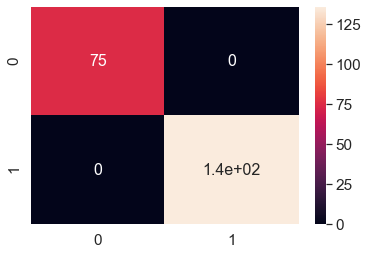

In [517]:
# plot confusion matrix
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [518]:
fp, tp, th = roc_curve(y_test, logistic_prediction)
Model_name = logistic_model.__class__.__name__
Model_compare.loc[4,'Model Name'] = Model_name
Model_compare.loc[4, 'Model Train Accuracy'] = round(logistic_model.score(X_train, y_train), 4)
Model_compare.loc[4, 'Model Test Accuracy'] = round(logistic_model.score(X_test, y_test), 4)
Model_compare.loc[4, 'Model Precision'] = precision_score(y_test, logistic_prediction)
Model_compare.loc[4, 'Model Recall'] = recall_score(y_test, logistic_prediction)
Model_compare.loc[4, 'Model AUC'] = auc(fp, tp)

Model_compare

,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precision,Model Recall,Model AUC
0,RandomForestClassifier,0.9964,0.9289,0.935252,0.955882,0.917941
1,KNeighborsClassifier,0.9348,0.9052,1.000000,1.000000,1.000000
2,SVC,0.9858,0.9526,0.956522,0.970588,0.945294
3,GaussianNB,0.9502,0.9431,0.942857,0.970588,0.931961
4,LogisticRegressionCV,1.0000,1.0000,1.000000,1.000000,1.000000


## Decision Tree Classifier

In [519]:
decision_tree_model = DecisionTreeClassifier().fit(X_train, y_train)

In [520]:
decision_tree_prediction = decision_tree_model.predict(X_test)

In [521]:
cm = confusion_matrix(y_test, decision_tree_prediction)
print("confusion matrix\n", cm)
print("\nAccuracy Score: ", accuracy_score(y_test, decision_tree_prediction))

confusion matrix
 [[ 67   8]
 [  7 129]]

Accuracy Score:  0.9289099526066351


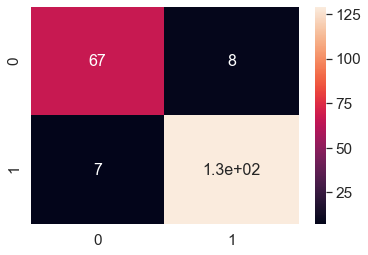

In [522]:
# plot confusion matrix
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [523]:
fp, tp, th = roc_curve(y_test, decision_tree_prediction)
Model_name = decision_tree_model.__class__.__name__
Model_compare.loc[5,'Model Name'] = Model_name
Model_compare.loc[5, 'Model Train Accuracy'] = round(decision_tree_model.score(X_train, y_train), 4)
Model_compare.loc[5, 'Model Test Accuracy'] = round(decision_tree_model.score(X_test, y_test), 4)
Model_compare.loc[5, 'Model Precision'] = precision_score(y_test, decision_tree_prediction)
Model_compare.loc[5, 'Model Recall'] = recall_score(y_test, decision_tree_prediction)
Model_compare.loc[5, 'Model AUC'] = auc(fp, tp)

Model_compare.sort_values(by = ['Model Test Accuracy'], ascending = False, inplace = True)  
Model_compare

,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precision,Model Recall,Model AUC
4,LogisticRegressionCV,1.0000,1.0000,1.000000,1.000000,1.000000
2,SVC,0.9858,0.9526,0.956522,0.970588,0.945294
3,GaussianNB,0.9502,0.9431,0.942857,0.970588,0.931961
0,RandomForestClassifier,0.9964,0.9289,0.935252,0.955882,0.917941
5,DecisionTreeClassifier,1.0000,0.9289,0.941606,0.948529,0.920931
1,KNeighborsClassifier,0.9348,0.9052,1.000000,1.000000,1.000000


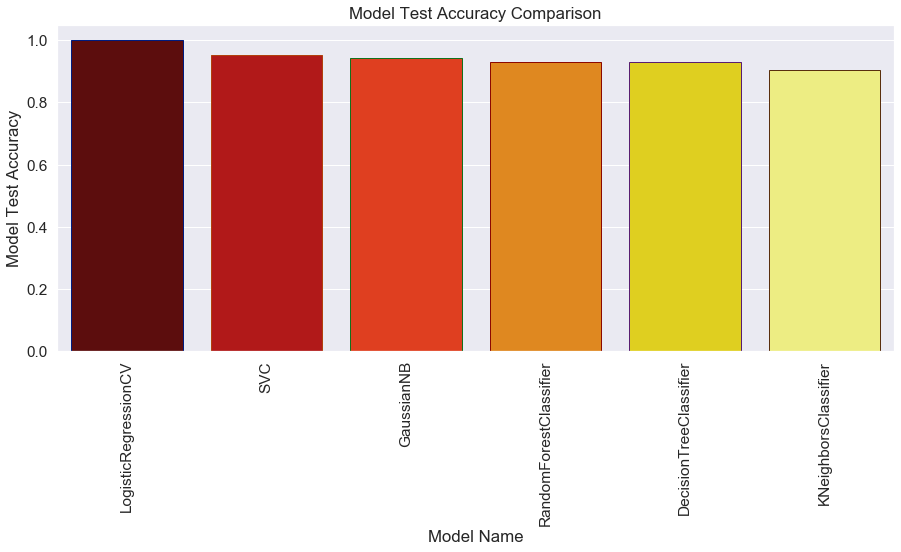

In [524]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model Name", y="Model Test Accuracy",data=Model_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparison')
plt.show()

In [525]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [526]:
# Evaluate each model
results = []
names = []
seed = 123
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hiand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

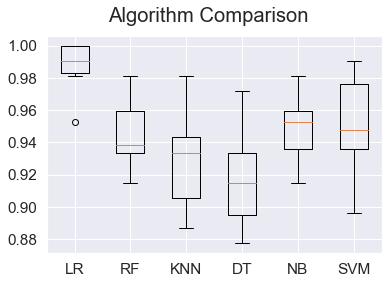

In [527]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [528]:
mean_accuracy = []
for i in range(len(results)):
    mean_accuracy.append(results[i].mean())
    
kfold_mean_accuracy = pd.DataFrame({"Model Name": names, "kfold mean accuracy": mean_accuracy}) 

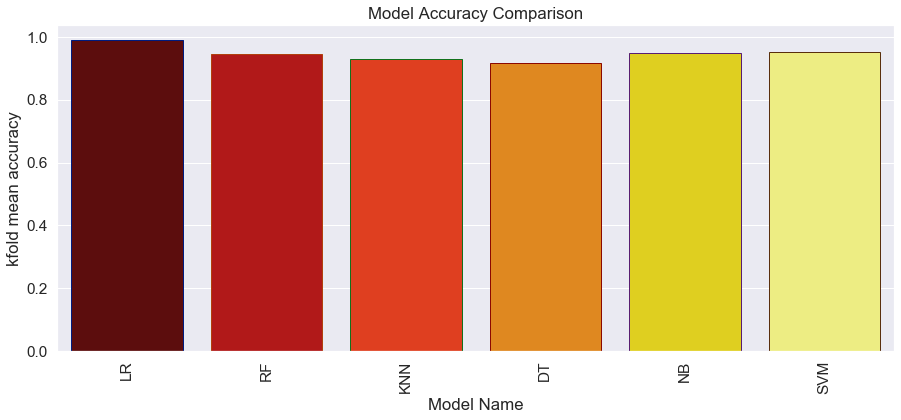

In [529]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model Name", y="kfold mean accuracy",data=kfold_mean_accuracy,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison')
plt.show()